In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
import sys
sys.path.append('../')
import nn_train.tools as tools
from nn_train.tools import pa_fields, seven_fields, fields
from nn_train.neural_network import NeuralNetwork

In [3]:
databases = [dir_path for dir_path in os.walk('..') if 'other.db' in dir_path[2]][0]
databases

('../Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [4]:
df = pd.DataFrame()

In [5]:
data_dir = databases[0]
for db_file in databases[2]:
    if db_file in ['clear_emotions.db', 'model_metrics.db']:
        continue
    db_path = os.path.join(data_dir, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)

In [6]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.9878594,0.003336495,0.008397053,0.001824096,0.007600656,6.9452e-05,0.000141165,-0.005060558,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.9878824,0.003385304,0.008362157,0.001782566,0.007644675,8.0761e-05,0.000138702,-0.004976853,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.9879055,0.003434114,0.008327262,0.001741036,0.007688694,9.207e-05,0.00013624,-0.004893148,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.9879286,0.003482923,0.008292366,0.001699506,0.007732714,0.000103379,0.000133777,-0.004809443,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.9880258,0.003506238,0.008183754,0.00164466,0.00778434,0.000113112,0.000130297,-0.004677515,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.9315634,3.7894e-05,0.02397099,0.06796286,0.02635098,0.000250268,0.000691861,-0.06792496,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.9356429,3.1707e-05,0.0237766,0.06259692,0.02374056,0.000229404,0.000798602,-0.06256521,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.9384109,2.6894e-05,0.023437,0.05935737,0.02117987,0.000212627,0.000848645,-0.05933048,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.9407817,2.3125e-05,0.02303489,0.05651735,0.01901644,0.000197417,0.000877875,-0.05649422,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [7]:
tools.make_valid_df(df, fields)

In [8]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [9]:
df_train_, df_other = tools.groupby(df, other=True)
df_train_

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:00.500_Смолин Александр_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:01.545_Керов Андрей_2,0.99,0.00,0.00,0.00,0.01,0.0,0.0,0.00,0.25
00:00:00.272_Керов Андрей_5,0.99,0.00,0.00,0.00,0.01,0.0,0.0,0.00,0.25
00:00:00.727_Керов Андрей_3,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:01:39.000_Балакин Владислав_1,0.99,0.00,0.01,0.01,0.01,0.0,0.0,-0.01,0.25
...,...,...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0,0.96,0.90
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0,0.97,0.67
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0,0.97,0.87


In [10]:
name_db = 'clear_emotions'
db_path = os.path.join(databases[0], f'{name_db}.db')
db_path

'../Data/databases/clear_emotions.db'

In [11]:
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
df_clear

,Index_,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
0,00:00:01.300_Смолин Александр_1,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
1,00:00:07.575_Керов Андрей_8,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
2,00:00:03.000_Боим_9,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
3,00:00:05.700_Provotorov_3,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
4,00:00:09.848_Korsakov_9,0.97,0.0,0.0,0.01,0.01,0.0,0.01,-0.01,0.3
...,...,...,...,...,...,...,...,...,...,...
525,00:00:07.700_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
526,00:00:08.200_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
527,00:00:07.300_Nasyrov_7,0.01,0.0,0.0,0.0,0.0,0.0,0.99,-0.99,0.62
528,00:00:08.900_Nasyrov_7,0.0,0.0,0.0,0.01,0.0,0.0,1.0,-1.0,0.63


In [12]:
tools.make_valid_df(df_clear, fields)

In [13]:
df_clear = df_clear[fields]

In [14]:
df_clear

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [15]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [16]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics

,model,layer,N,mean,norm,stat


In [17]:
models = []

In [18]:
# def removeprefix(text, prefix):
#     if text.startswith(prefix):
#         return text[len(prefix):]
#     return text

In [19]:
# removeprefix('model_third_6.7.5_2', 'model_third_')

'6.7.5_2'

In [20]:
# removeprefix('7.2.7_3', 'model_third_')

'7.2.7_3'

In [21]:
# '7.2.7_3'.split('_')

['7.2.7', '3']

In [22]:
# '7.2.7'.split('_')

['7.2.7']

### Загрузка всех 288 моделей

In [43]:
# v = 1
# layer = 'third'
# dir_path = f'../saved_models/{layer}/_{v}'
# models = [el for el in list(os.walk('..')) if dir_path in el[0]][0][1]
# models

['model_third_6.8.5',
 'model_third_9.8.5',
 'model_third_8.2.3',
 'model_third_7.9.9',
 'model_third_9.10.5',
 'model_third_9.7.7',
 'model_third_9.10.3',
 'model_third_8.8.5',
 'model_third_8.3.3',
 'model_third_7.6.3',
 'model_third_9.2.6',
 'model_third_9.3.6',
 'model_third_7.6.8',
 'model_third_6.10.7',
 'model_third_9.2.3',
 'model_third_9.6.9',
 'model_third_7.7.6',
 'model_third_9.7.3',
 'model_third_9.3.4',
 'model_third_8.9.8',
 'model_third_9.4.6',
 'model_third_9.2.4',
 'model_third_6.10.9',
 'model_third_9.3.5',
 'model_third_7.3.5',
 'model_third_6.6.7',
 'model_third_7.8.7',
 'model_third_7.10.6',
 'model_third_7.8.3',
 'model_third_9.5.4',
 'model_third_6.8.8',
 'model_third_9.5.9',
 'model_third_7.3.6',
 'model_third_9.2.7',
 'model_third_7.2.8',
 'model_third_9.2.9',
 'model_third_9.6.2',
 'model_third_7.2.2',
 'model_third_9.3.9',
 'model_third_8.4.5',
 'model_third_7.10.8',
 'model_third_7.2.6',
 'model_third_7.3.7',
 'model_third_8.8.4',
 'model_third_7.9.3',
 'mo

In [ ]:
# for i in range(len(models)):
#     model_layers_v = removeprefix(models[i], 'model_third_')
#     N = model_layers_v.split('_')[0]
#     path = os.path.join(dir_path, models[i])
#     model = load_model(path)
#     nn = NeuralNetwork(df[pa_fields], df[seven_fields], )
#     models[i] = [model_name, N, nn]

In [78]:
# def load_models(path_to_saved_models, df, layer='first', v=1):
#     dir_path = os.path.join(path_to_saved_models, layer, f'_{v}')
#     models = [el for el in list(os.walk('..')) if dir_path in el[0]][0][1]
#     for i in range(len(models)):
#         model_layers_v = removeprefix(models[i], f'model_{layer}_')
#         N = model_layers_v.split('_')[0]
#         path = os.path.join(dir_path, models[i])
#         model = load_model(path)
#         nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
#         models[i] = [model_layers_v, N, nn]
    
#     models.sort(key=lambda x: list(map(int, x[1].split('.'))))
    
#     return models

In [ ]:
v = 1
layer = 'third'
tools.load_models('../saved_models', df, layer, v)

In [ ]:
# v = 1
# i = 0
# dir_path = f'../saved_models/third/_{v}'
# path = os.path.join(dir_path, seven_models_[i] + f'_{v}')
# model = load_model(path)
# print(seven_models_[i])

In [2]:
v = 5
i = 0
seven_models_ = ['7.9.8', '7.10.9', '8.9.8', '8.10.8', '8.10.9', '9.6.7', '9.6.8']
dir_path = f'../saved_models/third/_{v}'
path = os.path.join(dir_path, seven_models_[i] + f'_{v}')
model = load_model(path)
print(seven_models_[i])

7.9.8


In [27]:
import matplotlib.pyplot as plt

metrics = ['mean', 'norm', 'stat']

clear_count_dict = {
    'Neutral': 200,
    'Happy': 200,
    'Sad': 14,
    'Angry': 44,
    'Surprised': 30,
    'Scared': 12,
    'Disgusted': 30
}

def plot_emotions(models, df_clear, clear_count_dict, df_metrics, df_clear_metrics, scale=False, figsize=(20, 15)):
    plt.figure(figsize=figsize)
    for i, model_tuple in enumerate(models):
        entry_dict = {'model': model_tuple[0]}
        for emotion in df_clear.columns[:7]:
            n = clear_count_dict[emotion]
            df_clear_emotion = df_clear.sort_values(emotion)[-n:]
            emotion_mean_value = model_tuple[2].predict(df_clear_emotion).mean()[emotion]
            if scale:
                emotion_mean_value /= df_clear_emotion.mean()[emotion]
            entry_dict.update({emotion: emotion_mean_value})
        values = [entry_dict[emotion] for emotion in seven_fields]
        plt.plot(seven_fields, values, label=model_tuple[0])
#         entry_dict.update({metric: df_metrics.iloc[i][metric] for metric in metrics})
        entry_dict.update({metric: '?' for metric in metrics})
        df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
    plt.xlabel("Эмоции")
    plt.ylabel("Максимальные значения")
    plt.legend()
    plt.show()
    return df_clear_metrics

In [28]:
df_clear_metrics = pd.DataFrame(columns = ['model'] + list(seven_fields) + metrics)
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat


/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../NeuralNetwork/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


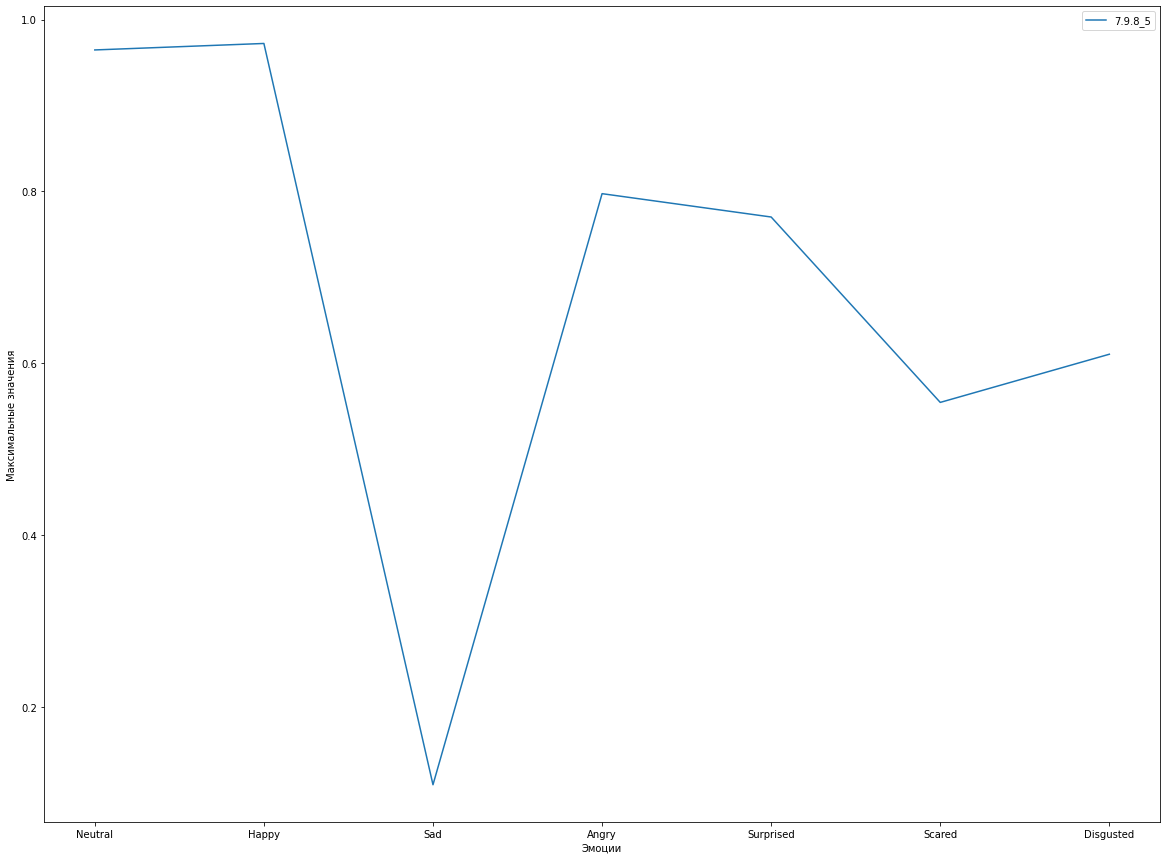

In [29]:
kwargs = {
    'models': [(seven_models_[i] + f'_{v}', seven_models_[i], NeuralNetwork(df[pa_fields], df[seven_fields], model))], 
    'df_clear': df_clear[fields], 
    'clear_count_dict': clear_count_dict,
    'df_metrics':pd.DataFrame(), 
    'df_clear_metrics': df_clear_metrics,
    'scale': True
}
df_clear_metrics = plot_emotions(**kwargs)

In [42]:
#Test on Aleksashina 1 - Incorrect cases in '00:00:35.000', '00:00:37.000'

In [47]:
data_dir = [el for el in list(os.walk('..')) if 'Data' in el[0]][0][0]
csv_file = "Participant 1_Aleksashina_Analysis 1_video_20190607_114857_detailed.csv"
csv_path = os.path.join(data_dir, csv_file)
csv_path

'../Data/Participant 1_Aleksashina_Analysis 1_video_20190607_114857_detailed.csv'

In [49]:
df_test = pd.read_csv(csv_path, sep='\t', skiprows = lambda i: i in range(8))
df_first = df_test.columns[0]
df_test.columns = df_test.columns[1:].insert(-2, 'UNKNOWN')
df_test.insert(0, df_first, df_test.index)
df_test

,Video Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal,...,Action Unit 12 - Right - Lip Corner Puller,Action Unit 14 - Right - Dimpler,Action Unit 15 - Right - Lip Corner Depressor,Action Unit 20 - Right - Lip Stretcher,Action Unit 43 - Right - Eyes Closed,Stimulus,Event Marker,UNKNOWN,Participant Name,Analysis Index
00:00:00.000,00:00:00.000,0.973121,0.019527,0.000404,0.043879,0.004099,0.000322,0.001946,-0.024352,0.255187,...,0.0,0.017570,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:00:00.100,00:00:00.100,0.974289,0.020129,0.000382,0.042413,0.004014,0.000298,0.001820,-0.022284,0.260074,...,0.0,0.032680,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:00:00.200,00:00:00.200,0.975457,0.020731,0.000361,0.040947,0.003930,0.000273,0.001693,-0.020216,0.264960,...,0.0,0.047791,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:00:00.300,00:00:00.300,0.975028,0.020480,0.000345,0.042622,0.003916,0.000256,0.001549,-0.022143,0.269347,...,0.0,0.060645,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:00:00.400,00:00:00.400,0.974542,0.020394,0.000326,0.044417,0.003831,0.000235,0.001438,-0.024022,0.273202,...,0.0,0.068510,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:50.900,00:01:50.900,0.969587,0.016939,0.000846,0.051552,0.004851,0.000162,0.000609,-0.034614,0.317045,...,0.0,0.199020,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:01:51.000,00:01:51.000,0.969071,0.017130,0.000856,0.052158,0.004848,0.000168,0.000615,-0.035027,0.316651,...,0.0,0.202110,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:01:51.100,00:01:51.100,0.968842,0.017460,0.000885,0.052096,0.004807,0.000172,0.000620,-0.034636,0.316144,...,0.0,0.196561,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:01:51.200,00:01:51.200,0.968608,0.018322,0.000899,0.052130,0.004756,0.000176,0.000617,-0.033808,0.315641,...,0.0,0.196161,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1


In [5]:
seven_fields = [
    'Neutral', 
    'Happy', 
    'Sad', 
    'Angry', 
    'Surprised', 
    'Scared', 
    'Disgusted'
]

In [51]:
seven_vector_test = df_test[seven_fields]
seven_vector_test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:00.000,0.973121,0.019527,0.000404,0.043879,0.004099,0.000322,0.001946
00:00:00.100,0.974289,0.020129,0.000382,0.042413,0.004014,0.000298,0.001820
00:00:00.200,0.975457,0.020731,0.000361,0.040947,0.003930,0.000273,0.001693
00:00:00.300,0.975028,0.020480,0.000345,0.042622,0.003916,0.000256,0.001549
00:00:00.400,0.974542,0.020394,0.000326,0.044417,0.003831,0.000235,0.001438
...,...,...,...,...,...,...,...
00:01:50.900,0.969587,0.016939,0.000846,0.051552,0.004851,0.000162,0.000609
00:01:51.000,0.969071,0.017130,0.000856,0.052158,0.004848,0.000168,0.000615
00:01:51.100,0.968842,0.017460,0.000885,0.052096,0.004807,0.000172,0.000620
00:01:51.200,0.968608,0.018322,0.000899,0.052130,0.004756,0.000176,0.000617


In [52]:
pa_fields =     [
    'Valence',
    'Arousal'
]

In [53]:
pa_vector_test = df_test[pa_fields]
pa_vector_test

,Valence,Arousal
00:00:00.000,-0.024352,0.255187
00:00:00.100,-0.022284,0.260074
00:00:00.200,-0.020216,0.264960
00:00:00.300,-0.022143,0.269347
00:00:00.400,-0.024022,0.273202
...,...,...
00:01:50.900,-0.034614,0.317045
00:01:51.000,-0.035027,0.316651
00:01:51.100,-0.034636,0.316144
00:01:51.200,-0.033808,0.315641


In [14]:
import sys
sys.path.append('../')
from NeuralNetwork.neural_network import NeuralNetwork
from NeuralNetwork.tools import save_to_db, groupby, make_valid_df

In [227]:
nn_test = NeuralNetwork(pa_vector_test, seven_vector_test, model)

In [58]:
#Будем дообучаться с '00:00:30.000' до '00:00:38.000'

In [228]:
df_x = nn_test.get_df_xy('00:00:30.000', '00:00:38.000')
df_x

,Valence,Arousal
00:00:30.000,0.725731,0.339765
00:00:30.100,0.737862,0.339765
00:00:30.200,0.726528,0.339271
00:00:30.300,0.712153,0.338363
00:00:30.400,0.709858,0.337356
...,...,...
00:00:37.600,0.002470,0.274409
00:00:37.700,-0.014269,0.274178
00:00:37.800,-0.012094,0.273958
00:00:37.900,0.001319,0.273736


In [229]:
df_y = nn_test.get_df_xy(xy = 'y') # Некорректный результат. Показывает Happy и Angry, но в дейстивтельности это Neutral,
#о чём и говорит нейросеть
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:30.000,0.132133,0.756668,0.001669,0.030937,0.000408,0.000671,0.001260
00:00:30.100,0.130447,0.768046,0.001361,0.030184,0.000499,0.000711,0.001268
00:00:30.200,0.147706,0.755921,0.001117,0.029393,0.000589,0.000680,0.001202
00:00:30.300,0.164955,0.739512,0.001299,0.027358,0.000643,0.000609,0.001229
00:00:30.400,0.171592,0.735537,0.001367,0.025679,0.000635,0.000525,0.001322
...,...,...,...,...,...,...,...
00:00:37.600,0.227043,0.561071,0.000104,0.558601,0.000207,0.000137,0.000757
00:00:37.700,0.225937,0.553081,0.000104,0.567351,0.000206,0.000137,0.000822
00:00:37.800,0.227376,0.557128,0.000104,0.569222,0.000204,0.000138,0.000881
00:00:37.900,0.228799,0.561518,0.000105,0.560199,0.000205,0.000137,0.000959


In [230]:
nn_test.predict()

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:30.000,0.240125,0.750082,1.615867e-08,2.470247e-11,2.362448e-13,0.000192,8.076376e-08
00:00:30.100,0.227305,0.762525,1.295145e-08,1.785422e-11,1.552351e-13,0.000183,7.051761e-08
00:00:30.200,0.239419,0.750927,1.592452e-08,2.419697e-11,2.298054e-13,0.000191,8.004513e-08
00:00:30.300,0.255498,0.735690,2.069546e-08,3.559246e-11,3.779374e-13,0.000201,9.400065e-08
00:00:30.400,0.258407,0.733228,2.157749e-08,3.789773e-11,4.091493e-13,0.000201,9.643910e-08
...,...,...,...,...,...,...,...
00:00:37.600,0.963113,0.010644,8.526266e-03,5.025715e-03,1.739228e-02,0.000432,3.601611e-04
00:00:37.700,0.965380,0.000380,1.465124e-02,1.458284e-02,1.248145e-02,0.000845,6.411672e-04
00:00:37.800,0.966175,0.000690,1.373520e-02,1.256865e-02,1.328707e-02,0.000776,5.842447e-04
00:00:37.900,0.964567,0.010008,8.916974e-03,5.362570e-03,1.729921e-02,0.000454,3.678799e-04


In [76]:
df_x = nn_test.get_df_xy('00:00:00.000', '00:00:00.100')
df_x

,Valence,Arousal
00:00:00.000,-0.024352,0.255187
00:00:00.100,-0.022284,0.260074


In [77]:
df_y = nn_test.get_df_xy(xy = 'y') #Neutral
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:00.000,0.973121,0.019527,0.000404,0.043879,0.004099,0.000322,0.001946
00:00:00.100,0.974289,0.020129,0.000382,0.042413,0.004014,0.000298,0.001820


In [78]:
nn_test.predict() #True

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:00.000,0.963367,0.000069,0.010101,0.012421,0.010183,0.00129,0.000822
00:00:00.100,0.963715,0.000086,0.009485,0.012213,0.011229,0.00122,0.000751


In [79]:
df_x = nn_test.get_df_xy('00:00:16.000', '00:00:17.000')
df_x

,Valence,Arousal
00:00:16.000,0.982274,0.763761
00:00:16.100,0.982497,0.761543
00:00:16.200,0.982457,0.759395
00:00:16.300,0.982780,0.757186
00:00:16.400,0.983181,0.754926
00:00:16.500,0.983513,0.752694
00:00:16.600,0.983897,0.750396
00:00:16.700,0.983741,0.748033
00:00:16.800,0.982967,0.745634
00:00:16.900,0.982504,0.743361


In [80]:
df_y = nn_test.get_df_xy(xy = 'y') # Happy
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:16.000,0.007980,0.984054,0.000013,0.001780,0.002200,0.001339,0.000060
00:00:16.100,0.007884,0.984246,0.000013,0.001749,0.002323,0.001302,0.000059
00:00:16.200,0.007840,0.984331,0.000013,0.001875,0.002367,0.001226,0.000057
00:00:16.300,0.007679,0.984653,0.000014,0.001873,0.002433,0.001246,0.000056
00:00:16.400,0.007520,0.984970,0.000014,0.001789,0.002598,0.001347,0.000054
00:00:16.500,0.007385,0.985240,0.000014,0.001727,0.002701,0.001379,0.000054
00:00:16.600,0.007240,0.985530,0.000014,0.001633,0.002647,0.001379,0.000053
00:00:16.700,0.007345,0.985320,0.000014,0.001580,0.002596,0.001452,0.000057
00:00:16.800,0.007730,0.984552,0.000013,0.001585,0.002543,0.001457,0.000060
00:00:16.900,0.007821,0.984368,0.000013,0.001865,0.002409,0.001359,0.000064


In [83]:
nn_test.predict() #Happy - True

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:16.000,0.042916,0.919313,0.00002,0.000178,2.713996e-20,2.201494e-09,2.013708e-15
00:00:16.100,0.043186,0.919322,0.00002,0.000179,2.637206e-20,2.156271e-09,1.998007e-15
00:00:16.200,0.043478,0.919232,0.00002,0.000180,2.594588e-20,2.119572e-09,1.995539e-15
00:00:16.300,0.043739,0.919280,0.00002,0.000181,2.510007e-20,2.073816e-09,1.975106e-15
00:00:16.400,0.043999,0.919355,0.00002,0.000182,2.418745e-20,2.026379e-09,1.951038e-15
00:00:16.500,0.044265,0.919405,0.00002,0.000182,2.338504e-20,1.982030e-09,1.930560e-15
00:00:16.600,0.044535,0.919473,0.00002,0.000183,2.254415e-20,1.936463e-09,1.907748e-15
00:00:16.700,0.044879,0.919332,0.00002,0.000184,2.225593e-20,1.902721e-09,1.910486e-15
00:00:16.800,0.045303,0.918955,0.00002,0.000187,2.258150e-20,1.882240e-09,1.942572e-15
00:00:16.900,0.045676,0.918699,0.00002,0.000189,2.261926e-20,1.857305e-09,1.960379e-15


In [84]:
df_x = nn_test.get_df_xy('00:00:21.000', '00:00:23.000')
df_x

,Valence,Arousal
00:00:21.000,0.964579,0.663201
00:00:21.100,0.943782,0.659207
00:00:21.200,0.871111,0.652940
00:00:21.300,0.762326,0.644623
00:00:21.400,0.640243,0.633058
00:00:21.500,0.520727,0.618742
00:00:21.600,0.413288,0.603645
00:00:21.700,0.323662,0.588063
00:00:21.800,0.251679,0.572172
00:00:21.900,0.194049,0.555099


In [86]:
df_y = nn_test.get_df_xy(xy = 'y') #Neutral - растёт, Happy - падает
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:21.000,0.019636,0.966993,0.000121,0.002414,0.002644,0.002096,0.000165
00:00:21.100,0.051523,0.946047,0.000221,0.002265,0.002547,0.002061,0.000355
00:00:21.200,0.135548,0.875374,0.000303,0.004263,0.002576,0.001903,0.000715
00:00:21.300,0.247636,0.770754,0.000351,0.008427,0.002592,0.001688,0.000968
00:00:21.400,0.365667,0.655739,0.000364,0.015496,0.002655,0.001459,0.001092
00:00:21.500,0.477339,0.544180,0.000356,0.023453,0.002761,0.001233,0.001120
00:00:21.600,0.576351,0.443905,0.000341,0.030617,0.002846,0.001026,0.001090
00:00:21.700,0.660592,0.357482,0.000767,0.033820,0.002812,0.000842,0.001407
00:00:21.800,0.730230,0.284993,0.004092,0.033314,0.002743,0.000681,0.002124
00:00:21.900,0.786891,0.225365,0.007646,0.031317,0.002668,0.000547,0.002939


In [88]:
nn_test.predict() #Neutral, Happy - True

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:21.000,0.061118,0.908523,0.000022,0.000271,2.575113e-20,1.181792e-09,2.812100e-15
00:00:21.100,0.065230,0.899086,0.000025,0.000319,6.336812e-20,1.451722e-09,4.686962e-15
00:00:21.200,0.079852,0.859491,0.000040,0.000549,1.572390e-18,3.173164e-09,2.815870e-14
00:00:21.300,0.113662,0.784899,0.000076,0.000995,2.232076e-16,1.560046e-08,4.456522e-13
00:00:21.400,0.171750,0.676441,0.000155,0.001743,6.127335e-14,1.134428e-07,1.026305e-11
00:00:21.500,0.250831,0.547381,0.000313,0.003055,1.454273e-11,7.670541e-07,2.203135e-10
00:00:21.600,0.341393,0.424695,0.000589,0.005099,1.946053e-09,4.178166e-06,3.458214e-09
00:00:21.700,0.429502,0.327966,0.000999,0.007904,1.125135e-07,1.665897e-05,3.423956e-08
00:00:21.800,0.506393,0.258810,0.001529,0.011378,2.837796e-06,4.885221e-05,2.148360e-07
00:00:21.900,0.570978,0.210282,0.002151,0.015480,3.613842e-05,1.105078e-04,9.288581e-07


In [89]:
df_x = nn_test.get_df_xy('00:00:36.000', '00:00:37.000')
df_x

,Valence,Arousal
00:00:36.000,-0.214707,0.260461
00:00:36.100,-0.215263,0.259816
00:00:36.200,-0.183632,0.259228
00:00:36.300,-0.147168,0.258936
00:00:36.400,-0.117836,0.258876
00:00:36.500,-0.091053,0.258876
00:00:36.600,-0.067193,0.262077
00:00:36.700,-0.040169,0.265263
00:00:36.800,-0.026193,0.267305
00:00:36.900,-0.011659,0.269329


In [92]:
df_y = nn_test.get_df_xy(xy = 'y') # Некорректный кейс. Neutral (а он показывает Happy и Angry), но нейронка верно
# предсказывает
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:36.000,0.189787,0.446914,0.000195,0.661620,0.000168,0.000154,0.000912
00:00:36.100,0.184945,0.455178,0.000176,0.670441,0.000158,0.000153,0.000907
00:00:36.200,0.189195,0.478034,0.000159,0.661666,0.000151,0.000145,0.000883
00:00:36.300,0.196710,0.498410,0.000149,0.645577,0.000148,0.000137,0.000835
00:00:36.400,0.201433,0.516213,0.000143,0.634049,0.000147,0.000128,0.000784
00:00:36.500,0.206537,0.530494,0.000139,0.621547,0.000150,0.000119,0.000746
00:00:36.600,0.213259,0.539001,0.000133,0.606194,0.000154,0.000111,0.000718
00:00:36.700,0.216637,0.549414,0.000127,0.589583,0.000160,0.000107,0.000705
00:00:36.800,0.218805,0.557725,0.000121,0.583918,0.000159,0.000102,0.000706
00:00:36.900,0.219156,0.565864,0.000115,0.577523,0.000164,0.000101,0.000695


In [93]:
nn_test.predict() # НОРМАЛЬНО.

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:36.000,0.798485,8.503886e-09,0.087429,0.157994,0.002790,0.004498,0.021447
00:00:36.100,0.798640,8.409848e-09,0.088055,0.157671,0.002756,0.004537,0.021717
00:00:36.200,0.814477,1.406827e-08,0.072132,0.143637,0.003342,0.003984,0.015298
00:00:36.300,0.837377,2.669409e-08,0.059787,0.103439,0.004337,0.004820,0.012410
00:00:36.400,0.853078,4.332324e-08,0.051001,0.079499,0.005360,0.005461,0.010403
00:00:36.500,0.866802,7.057116e-08,0.042299,0.063035,0.006491,0.005397,0.008255
00:00:36.600,0.912647,7.860939e-07,0.024702,0.039461,0.007870,0.002853,0.003275
00:00:36.700,0.947246,1.210463e-05,0.013381,0.022499,0.009750,0.001420,0.001165
00:00:36.800,0.959710,5.382282e-05,0.009991,0.014659,0.011610,0.001216,0.000783
00:00:36.900,0.967636,2.779365e-04,0.007262,0.009849,0.015347,0.001007,0.000533


In [95]:
df_x = nn_test.get_df_xy('00:00:42.000', '00:00:42.500')
df_x

,Valence,Arousal
00:00:42.000,-0.431208,0.258913
00:00:42.100,-0.276828,0.258345
00:00:42.200,-0.126044,0.257805
00:00:42.300,0.012774,0.257292
00:00:42.400,0.132797,0.256804
00:00:42.500,0.236716,0.256341


In [98]:
df_y = nn_test.get_df_xy(xy = 'y') # Из Neutral/Angry в Happy 
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:42.000,0.502243,0.181685,0.000275,0.612893,0.003011,0.000579,0.002119
00:00:42.100,0.535251,0.241092,0.000246,0.517920,0.004662,0.000863,0.002023
00:00:42.200,0.544003,0.302449,0.000221,0.428494,0.006192,0.001107,0.001881
00:00:42.300,0.536196,0.361938,0.000196,0.349164,0.007338,0.001198,0.001740
00:00:42.400,0.522931,0.414101,0.000175,0.281304,0.008044,0.001221,0.001633
00:00:42.500,0.502529,0.461604,0.000155,0.224888,0.008423,0.001205,0.001563


In [100]:
nn_test.predict() # True

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:42.000,0.569326,6.259892e-09,0.088641,0.235171,4.722536e-03,0.001539,7.011250e-02
00:00:42.100,0.746620,7.088180e-09,0.092001,0.176985,3.008842e-03,0.003555,3.184983e-02
00:00:42.200,0.849912,3.851442e-08,0.053790,0.085091,4.972339e-03,0.005375,1.102757e-02
00:00:42.300,0.939369,3.322423e-02,0.002797,0.009693,3.604650e-02,0.000492,1.846552e-04
00:00:42.400,0.831111,1.557628e-01,0.004008,0.017790,5.407972e-05,0.000095,9.389396e-06
00:00:42.500,0.770295,2.481089e-01,0.002343,0.012279,3.763998e-07,0.000014,5.578724e-07


In [101]:
df_x = nn_test.get_df_xy('00:00:42.500', '00:00:43.000')
df_x

,Valence,Arousal
00:00:42.500,0.236716,0.256341
00:00:42.600,0.321085,0.255900
00:00:42.700,0.388269,0.255482
00:00:42.800,0.446405,0.255151
00:00:42.900,0.496219,0.255151
00:00:43.000,0.541093,0.258207


In [102]:
df_y = nn_test.get_df_xy(xy = 'y') # Happy растёт - верно. Остальное - шум.
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:42.500,0.502529,0.461604,0.000155,0.224888,0.008423,0.001205,0.001563
00:00:42.600,0.478964,0.499737,0.000136,0.178652,0.008664,0.001159,0.001451
00:00:42.700,0.460155,0.529674,0.000120,0.141405,0.008811,0.001105,0.001370
00:00:42.800,0.436789,0.558047,0.000108,0.111643,0.008762,0.001038,0.001290
00:00:42.900,0.412718,0.584249,0.000096,0.088029,0.008597,0.000969,0.001202
00:00:43.000,0.387863,0.610635,0.000088,0.069542,0.008211,0.000915,0.001102


In [103]:
nn_test.predict() # True

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:42.500,0.770295,0.248109,0.002343,0.012279,3.763998e-07,1.362644e-05,5.578724e-07
00:00:42.600,0.712315,0.326305,0.001439,0.008428,7.217993e-09,3.284732e-06,6.441063e-08
00:00:42.700,0.660486,0.396703,0.000976,0.006236,3.095585e-10,1.058477e-06,1.155088e-08
00:00:42.800,0.611941,0.460873,0.000696,0.004811,2.035453e-11,3.958681e-07,2.605214e-09
00:00:42.900,0.564657,0.510260,0.000509,0.003924,2.056544e-12,1.631051e-07,7.084000e-10
00:00:43.000,0.517574,0.554221,0.000382,0.003344,2.655574e-13,7.221468e-08,2.140371e-10


In [107]:
df_x = nn_test.get_df_xy('00:00:47.000', '00:00:48.000')
df_x

,Valence,Arousal
00:00:47.000,0.402050,0.299550
00:00:47.100,0.402333,0.299550
00:00:47.200,0.403500,0.299481
00:00:47.300,0.406274,0.299384
00:00:47.400,0.406193,0.299230
00:00:47.500,0.415290,0.299125
00:00:47.600,0.418139,0.298942
00:00:47.700,0.423579,0.298760
00:00:47.800,0.431206,0.298555
00:00:47.900,0.440355,0.298336


In [108]:
df_y = nn_test.get_df_xy(xy = 'y') # Neutral - 71-69%, Happy - 40-45%
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:47.000,0.710237,0.407821,0.000096,0.005771,0.004438,0.000165,0.000185
00:00:47.100,0.711148,0.408063,0.000100,0.005730,0.004281,0.000168,0.000181
00:00:47.200,0.713677,0.409234,0.000102,0.005734,0.004085,0.000167,0.000180
00:00:47.300,0.714254,0.412195,0.000105,0.005921,0.003882,0.000161,0.000175
00:00:47.400,0.716460,0.412444,0.000108,0.006251,0.003699,0.000162,0.000173
00:00:47.500,0.713320,0.421777,0.000107,0.006487,0.003612,0.000162,0.000170
00:00:47.600,0.714224,0.424814,0.000107,0.006675,0.003599,0.000168,0.000171
00:00:47.700,0.710022,0.430272,0.000107,0.006693,0.003646,0.000182,0.000167
00:00:47.800,0.706393,0.437887,0.000105,0.006681,0.003628,0.000192,0.000165
00:00:47.900,0.701044,0.447169,0.000104,0.006814,0.003610,0.000197,0.000161


In [110]:
nn_test.predict() # Норм.

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:47.000,0.596617,0.394625,0.000795,0.008524,2.255635e-10,6.161090e-07,5.513114e-09
00:00:47.100,0.596371,0.394932,0.000794,0.008513,2.225982e-10,6.131782e-07,5.473331e-09
00:00:47.200,0.595437,0.396225,0.000788,0.008464,2.106501e-10,6.014857e-07,5.315164e-09
00:00:47.300,0.593133,0.399280,0.000776,0.008354,1.848529e-10,5.743283e-07,4.954533e-09
00:00:47.400,0.593394,0.399251,0.000777,0.008346,1.853461e-10,5.757398e-07,4.971610e-09
00:00:47.500,0.585550,0.409239,0.000737,0.008010,1.209595e-10,4.940586e-07,3.941143e-09
00:00:47.600,0.583270,0.412442,0.000725,0.007897,1.057058e-10,4.714367e-07,3.669445e-09
00:00:47.700,0.578698,0.418512,0.000703,0.007697,8.182202e-11,4.305706e-07,3.196862e-09
00:00:47.800,0.572205,0.427043,0.000673,0.007429,5.716261e-11,3.790485e-07,2.633924e-09
00:00:47.900,0.564349,0.437324,0.000639,0.007121,3.718167e-11,3.252425e-07,2.087265e-09


In [116]:
df_x = nn_test.get_df_xy('00:01:06.000', '00:01:07.000') 
df_x

,Valence,Arousal
00:01:06.000,-0.103109,0.283163
00:01:06.100,-0.092284,0.282977
00:01:06.200,-0.085587,0.282701
00:01:06.300,-0.081722,0.282360
00:01:06.400,-0.070623,0.281872
00:01:06.500,-0.059186,0.281336
00:01:06.600,-0.049184,0.280761
00:01:06.700,-0.035158,0.280176
00:01:06.800,-0.022642,0.279583
00:01:06.900,-0.008292,0.278953


In [117]:
df_y = nn_test.get_df_xy(xy = 'y') # По факту: из небольшого Angry-Sad в чистый Neutral
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:01:06.000,0.735105,0.152540,0.000869,0.255649,0.001597,0.000651,0.000894
00:01:06.100,0.734141,0.157158,0.000902,0.249441,0.001582,0.000660,0.000887
00:01:06.200,0.734078,0.159937,0.000916,0.245525,0.001590,0.000643,0.000889
00:01:06.300,0.734819,0.161817,0.000917,0.243539,0.001637,0.000628,0.000900
00:01:06.400,0.744191,0.165657,0.000897,0.236280,0.001662,0.000610,0.000898
00:01:06.500,0.753816,0.168743,0.000880,0.227929,0.001680,0.000600,0.000896
00:01:06.600,0.764034,0.169269,0.000862,0.218453,0.001695,0.000586,0.000879
00:01:06.700,0.775219,0.172246,0.000826,0.207403,0.001711,0.000575,0.000872
00:01:06.800,0.785698,0.174468,0.000797,0.197109,0.001756,0.000571,0.000872
00:01:06.900,0.793438,0.177854,0.000771,0.186146,0.001756,0.000576,0.000882


In [118]:
nn_test.predict() # True

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:01:06.000,0.853556,6.484527e-08,0.042754,0.066417,0.008525,0.006269,0.008846
00:01:06.100,0.858175,7.515944e-08,0.040097,0.060730,0.009190,0.006386,0.008234
00:01:06.200,0.869634,1.206136e-07,0.035894,0.054794,0.009557,0.005659,0.006839
00:01:06.300,0.878419,1.783464e-07,0.032955,0.050864,0.009735,0.005068,0.005883
00:01:06.400,0.900690,5.480205e-07,0.025730,0.040983,0.010338,0.003706,0.003819
00:01:06.500,0.919779,1.742767e-06,0.019904,0.032737,0.010992,0.002683,0.002444
00:01:06.600,0.933686,4.793284e-06,0.015888,0.026864,0.011580,0.002020,0.001654
00:01:06.700,0.949405,1.980531e-05,0.011561,0.020315,0.012498,0.001359,0.000956
00:01:06.800,0.959543,7.803047e-05,0.008827,0.014756,0.014453,0.001077,0.000650
00:01:06.900,0.965982,4.878044e-04,0.006061,0.009991,0.020776,0.000893,0.000435


In [123]:
df_x = nn_test.get_df_xy('00:01:25.000', '00:01:26.000')
df_x

,Valence,Arousal
00:01:25.000,0.780514,0.429943
00:01:25.100,0.770180,0.429943
00:01:25.200,0.763402,0.429846
00:01:25.300,0.759536,0.429766
00:01:25.400,0.746653,0.429272
00:01:25.500,0.735193,0.428437
00:01:25.600,0.723706,0.427788
00:01:25.700,0.711666,0.427098
00:01:25.800,0.700324,0.426254
00:01:25.900,0.687633,0.425157


In [124]:
df_y = nn_test.get_df_xy(xy = 'y') # Neutral - 17-31, Happy 78-68
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:01:25.000,0.170274,0.782413,0.000291,0.001899,0.000740,0.000223,0.000262
00:01:25.100,0.184500,0.772122,0.000297,0.001941,0.000743,0.000216,0.000269
00:01:25.200,0.192932,0.765428,0.000299,0.002026,0.000752,0.000217,0.000271
00:01:25.300,0.197078,0.761560,0.000346,0.002024,0.000750,0.000216,0.000280
00:01:25.400,0.213567,0.748624,0.000404,0.001971,0.000785,0.000210,0.000304
00:01:25.500,0.234013,0.737090,0.000432,0.001897,0.000816,0.000200,0.000325
00:01:25.600,0.253310,0.725588,0.000472,0.001882,0.000829,0.000195,0.000335
00:01:25.700,0.271598,0.713548,0.000502,0.001882,0.000841,0.000194,0.000344
00:01:25.800,0.284844,0.702225,0.000512,0.001901,0.000863,0.000196,0.000349
00:01:25.900,0.300856,0.689563,0.000540,0.001930,0.000882,0.000197,0.000374


In [125]:
nn_test.predict() # Супер

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:01:25.000,0.185738,0.776067,0.000071,0.002015,1.405402e-17,1.439282e-09,2.106466e-13
00:01:25.100,0.190030,0.766711,0.000076,0.002171,2.235535e-17,1.620363e-09,2.720733e-13
00:01:25.200,0.192934,0.760420,0.000079,0.002281,3.028633e-17,1.749939e-09,3.217623e-13
00:01:25.300,0.194619,0.756778,0.000081,0.002346,3.600640e-17,1.828095e-09,3.540669e-13
00:01:25.400,0.201482,0.745198,0.000088,0.002525,6.482493e-17,2.196884e-09,4.904877e-13
00:01:25.500,0.208718,0.735177,0.000094,0.002659,1.100675e-16,2.653513e-09,6.586702e-13
00:01:25.600,0.216070,0.724911,0.000100,0.002798,1.874277e-16,3.212638e-09,8.853407e-13
00:01:25.700,0.223981,0.713887,0.000108,0.002951,3.274360e-16,3.925253e-09,1.207097e-12
00:01:25.800,0.231719,0.703235,0.000115,0.003106,5.528426e-16,4.731058e-09,1.616036e-12
00:01:25.900,0.240677,0.691027,0.000124,0.003291,9.920212e-16,5.821099e-09,2.239415e-12


In [129]:
df_x = nn_test.get_df_xy('00:01:38.000', '00:01:39.000')
df_x

,Valence,Arousal
00:01:38.000,0.724162,0.396821
00:01:38.100,0.725256,0.395991
00:01:38.200,0.725922,0.395153
00:01:38.300,0.732286,0.394256
00:01:38.400,0.728995,0.393182
00:01:38.500,0.722660,0.391859
00:01:38.600,0.718987,0.390558
00:01:38.700,0.718649,0.389392
00:01:38.800,0.717313,0.388218
00:01:38.900,0.715846,0.386973


In [130]:
df_y = nn_test.get_df_xy(xy = 'y') # Neutral - 24-28, Happy 72-71
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:01:38.000,0.247921,0.727225,0.000302,0.002924,0.002745,0.003063,0.000617
00:01:38.100,0.245379,0.728168,0.000297,0.002864,0.002651,0.002912,0.000596
00:01:38.200,0.248069,0.728863,0.000286,0.002826,0.002657,0.002941,0.000590
00:01:38.300,0.249211,0.735282,0.000272,0.002743,0.002670,0.002996,0.000580
00:01:38.400,0.262386,0.731932,0.000260,0.002584,0.002722,0.002937,0.000555
00:01:38.500,0.279061,0.725456,0.000248,0.002368,0.002732,0.002796,0.000528
00:01:38.600,0.286941,0.721679,0.000234,0.002201,0.002678,0.002692,0.000514
00:01:38.700,0.286773,0.721287,0.000228,0.002108,0.002710,0.002639,0.000534
00:01:38.800,0.286524,0.719876,0.000228,0.002073,0.002824,0.002564,0.000535
00:01:38.900,0.286901,0.718372,0.000235,0.002071,0.002820,0.002526,0.000525


In [131]:
nn_test.predict() # Шикарно

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:01:38.000,0.231158,0.720626,0.000101,0.003149,1.388600e-16,2.321240e-09,8.388139e-13
00:01:38.100,0.230825,0.721307,0.000100,0.003138,1.312671e-16,2.262854e-09,8.154586e-13
00:01:38.200,0.230780,0.721629,0.000100,0.003134,1.265406e-16,2.221373e-09,8.013978e-13
00:01:38.300,0.226986,0.726649,0.000096,0.003042,9.388035e-17,1.983834e-09,6.815153e-13
00:01:38.400,0.229675,0.723634,0.000098,0.003101,1.083384e-16,2.074583e-09,7.404456e-13
00:01:38.500,0.234553,0.717982,0.000101,0.003211,1.435015e-16,2.276195e-09,8.689672e-13
00:01:38.600,0.237673,0.714521,0.000104,0.003281,1.682509e-16,2.390529e-09,9.531785e-13
00:01:38.700,0.238474,0.713904,0.000104,0.003296,1.694463e-16,2.378953e-09,9.607771e-13
00:01:38.800,0.239963,0.712439,0.000105,0.003328,1.786306e-16,2.406623e-09,9.932552e-13
00:01:38.900,0.241584,0.710838,0.000106,0.003363,1.893479e-16,2.438278e-09,1.030207e-12


In [133]:
# 7.9.8 - тест пройден достойно)

In [134]:
databases = [dir_path for dir_path in os.walk('..') if 'other.db' in dir_path[2]][0]
databases

('../Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [11]:
df = pd.DataFrame()

In [12]:
import sqlite3

data_dir = databases[0]
for db_file in databases[2]:
    if db_file in ['clear_emotions.db', 'model_metrics.db']:
        continue
    db_path = os.path.join(data_dir, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)

In [138]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.9878594,0.003336495,0.008397053,0.001824096,0.007600656,6.9452e-05,0.000141165,-0.005060558,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.9878824,0.003385304,0.008362157,0.001782566,0.007644675,8.0761e-05,0.000138702,-0.004976853,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.9879055,0.003434114,0.008327262,0.001741036,0.007688694,9.207e-05,0.00013624,-0.004893148,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.9879286,0.003482923,0.008292366,0.001699506,0.007732714,0.000103379,0.000133777,-0.004809443,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.9880258,0.003506238,0.008183754,0.00164466,0.00778434,0.000113112,0.000130297,-0.004677515,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.9315634,3.7894e-05,0.02397099,0.06796286,0.02635098,0.000250268,0.000691861,-0.06792496,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.9356429,3.1707e-05,0.0237766,0.06259692,0.02374056,0.000229404,0.000798602,-0.06256521,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.9384109,2.6894e-05,0.023437,0.05935737,0.02117987,0.000212627,0.000848645,-0.05933048,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.9407817,2.3125e-05,0.02303489,0.05651735,0.01901644,0.000197417,0.000877875,-0.05649422,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [17]:
pa_fields =     [
    'Valence',
    'Arousal'
]
seven_fields = [
    'Neutral', 
    'Happy', 
    'Sad', 
    'Angry', 
    'Surprised', 
    'Scared', 
    'Disgusted'
]

In [18]:
fields = seven_fields + pa_fields
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [142]:
make_valid_df(df, fields)

In [143]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [144]:
df_train, df_other = groupby(df, other=True)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.121_Боим_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:01.060_Боим_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:01:50.800_Смолин Александр_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:59.600_Смолин Александр_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:00.606_Керов Андрей_8,0.99,0.00,0.01,0.01,0.01,0.0,0.0,-0.01,0.25
...,...,...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0,0.96,0.90
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0,0.97,0.67
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0,0.97,0.87


In [149]:
df_other.sort_values('Sad')[-50:-25]

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:04.700_Nasyrov_5,0.11,0.00,0.40,0.40,0.00,0.00,0.06,-0.79,0.65
00:00:10.100_Zaharova_3,0.13,0.00,0.40,0.38,0.00,0.00,0.05,-0.76,0.65
00:00:10.800_Zaharova_3,0.18,0.00,0.41,0.26,0.00,0.00,0.05,-0.65,0.65
00:00:36.300_Турчина Екатерина_1,0.18,0.00,0.41,0.26,0.00,0.00,0.05,-0.65,0.65
00:00:10.500_Zaharova_3,0.18,0.00,0.41,0.26,0.00,0.00,0.05,-0.65,0.65
00:00:41.700_Левандовский Кирилл_1,0.20,0.00,0.42,0.42,0.00,0.00,0.15,-0.60,0.55
00:01:22.900_Куликов Алексей_1,0.49,0.00,0.42,0.10,0.00,0.00,0.02,-0.42,0.33
00:00:41.300_Левандовский Кирилл_1,0.20,0.00,0.42,0.42,0.00,0.00,0.15,-0.60,0.55
00:00:30.900_Бушунов Виктор_1,0.31,0.00,0.43,0.03,0.00,0.00,0.00,-0.43,0.65


In [150]:
nn_test.predict(df_other.sort_values('Sad')[-50:-25])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:04.700_Nasyrov_5,0.111598,6.035431e-08,0.109196,0.510804,0.003699,0.003656,0.294474
00:00:10.100_Zaharova_3,0.132179,4.100965e-08,0.118579,0.499257,0.003411,0.004165,0.286146
00:00:10.800_Zaharova_3,0.223043,1.820681e-08,0.134728,0.411559,0.003505,0.007171,0.213977
00:00:36.300_Турчина Екатерина_1,0.223043,1.820681e-08,0.134728,0.411559,0.003505,0.007171,0.213977
00:00:10.500_Zaharova_3,0.223043,1.820681e-08,0.134728,0.411559,0.003505,0.007171,0.213977
00:00:41.700_Левандовский Кирилл_1,0.352087,6.613201e-09,0.129047,0.367853,0.003347,0.004074,0.169048
00:01:22.900_Куликов Алексей_1,0.556792,6.557696e-09,0.078033,0.283487,0.007111,0.001512,0.047661
00:00:41.300_Левандовский Кирилл_1,0.352087,6.613201e-09,0.129047,0.367853,0.003347,0.004074,0.169048
00:00:30.900_Бушунов Виктор_1,0.450147,1.367555e-08,0.129626,0.202823,0.006978,0.025937,0.085342


In [151]:
df_other.sort_values('Angry')[-50:-25]

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:21.500_Бушунов Виктор_1,0.03,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.64
00:00:40.300_Бушунов Виктор_1,0.10,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.74
00:00:37.000_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.84
00:00:36.400_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.81
00:00:38.500_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.81
00:00:36.900_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.84
00:00:33.400_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.81
00:01:21.300_Бушунов Виктор_1,0.02,0.0,0.0,0.98,0.0,0.0,0.0,-0.98,0.64
00:01:19.900_Бушунов Виктор_1,0.01,0.0,0.0,0.98,0.0,0.0,0.0,-0.98,0.66


In [152]:
nn_test.predict(df_other.sort_values('Angry')[-50:-25])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:01:21.500_Бушунов Виктор_1,0.041067,5.074712e-07,0.067958,0.560594,0.005695,0.001719,0.366908
00:00:40.300_Бушунов Виктор_1,0.018873,3.370506e-06,0.047214,0.733375,0.009846,0.001288,0.197419
00:00:37.000_Бушунов Виктор_1,0.010181,2.687447e-05,0.039637,0.687667,0.019344,0.003784,0.189221
00:00:36.400_Бушунов Виктор_1,0.011992,1.408388e-05,0.040753,0.727586,0.015545,0.002302,0.176255
00:00:38.500_Бушунов Виктор_1,0.011992,1.408388e-05,0.040753,0.727586,0.015545,0.002302,0.176255
00:00:36.900_Бушунов Виктор_1,0.010181,2.687447e-05,0.039637,0.687667,0.019344,0.003784,0.189221
00:00:33.400_Бушунов Виктор_1,0.011992,1.408388e-05,0.040753,0.727586,0.015545,0.002302,0.176255
00:01:21.300_Бушунов Виктор_1,0.038611,5.772341e-07,0.066020,0.564383,0.005851,0.001645,0.370044
00:01:19.900_Бушунов Виктор_1,0.033089,8.429657e-07,0.061414,0.601716,0.006529,0.001553,0.331052


In [155]:
df_other.sort_values('Angry')[-200:-175]

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:15.800_Лебедев Андрей_1,0.24,0.00,0.02,0.63,0.00,0.0,0.22,-0.63,0.50
00:01:22.600_Бушунов Виктор_1,0.33,0.00,0.00,0.63,0.00,0.0,0.18,-0.63,0.53
00:00:37.000_Турчина Екатерина_1,0.19,0.00,0.00,0.63,0.00,0.0,0.12,-0.62,0.61
00:00:34.300_Лебедев Андрей_1,0.21,0.04,0.07,0.63,0.00,0.0,0.02,-0.60,0.50
00:01:07.400_Бушунов Виктор_1,0.04,0.00,0.00,0.63,0.00,0.0,0.38,-0.94,0.69
00:00:10.300_Nasyrov_7,0.04,0.00,0.00,0.63,0.00,0.0,0.38,-0.94,0.69
00:00:32.300_Турчина Екатерина_1,0.24,0.00,0.00,0.64,0.00,0.0,0.30,-0.64,0.52
00:01:40.500_Бушунов Виктор_1,0.49,0.02,0.00,0.65,0.01,0.0,0.00,-0.63,0.27
00:00:31.800_Смолин Александр_1,0.35,0.01,0.01,0.65,0.00,0.0,0.01,-0.64,0.27


In [156]:
nn_test.predict(df_other.sort_values('Angry')[-200:-175])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:01:15.800_Лебедев Андрей_1,0.367564,6.056184e-09,0.131006,0.308523,0.003244,0.004006,0.237629
00:01:22.600_Бушунов Виктор_1,0.348196,6.116736e-09,0.135122,0.335911,0.003064,0.004265,0.226916
00:00:37.000_Турчина Екатерина_1,0.296934,7.271677e-09,0.139656,0.424133,0.002877,0.004756,0.177602
00:00:34.300_Лебедев Андрей_1,0.384762,6.504454e-09,0.122509,0.320703,0.003682,0.003671,0.183584
00:01:07.400_Бушунов Виктор_1,0.033631,8.886500e-07,0.061886,0.641412,0.006909,0.001696,0.266114
00:00:10.300_Nasyrov_7,0.033631,8.886500e-07,0.061886,0.641412,0.006909,0.001696,0.266114
00:00:32.300_Турчина Екатерина_1,0.349028,5.953087e-09,0.136731,0.322519,0.002994,0.004300,0.250315
00:01:40.500_Бушунов Виктор_1,0.420701,6.591906e-09,0.112053,0.223728,0.003452,0.001870,0.247815
00:00:31.800_Смолин Александр_1,0.414157,6.443640e-09,0.113844,0.222601,0.003338,0.001924,0.263200


In [158]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [19]:
databases = [dir_path for dir_path in os.walk('..') if 'other.db' in dir_path[2]][0]
data_dir = databases[0]
db_file = databases[2][1]
db_path = os.path.join(data_dir, db_file)
name_db = db_file[:-3]
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
make_valid_df(df_clear, fields)
df_clear

,Index_,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,,
00:00:01.300_Смолин Александр_1,00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [183]:
full_df_list = [df_clear[fields]]
percent_df_list = [df]

In [184]:
df_train, df_test = nn_test.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:08.100_Лебедев Андрей_1,0.972387,0.000136,0.016465,0.005541,0.006346,0.000703,0.018359,-0.018223,0.290847
00:00:05.900_Бушунов Виктор_1,0.988074,0.000004,0.002617,0.017637,0.000901,0.000005,0.000415,-0.017633,0.247500
00:00:06.939_Керов Андрей_3,0.902079,0.000248,0.083301,0.000052,0.035617,0.001420,0.000004,-0.083053,0.402048
00:00:02.393_Fomin_10,0.532837,0.142195,0.028540,0.000619,0.032067,0.000020,0.000112,0.113655,0.335496
00:00:00.181_Korsakov_8,0.995867,0.000015,0.000804,0.006561,0.003995,0.000869,0.000759,-0.006545,0.344375
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.990000,-0.990000,0.630000
00:00:08.200_Nasyrov_7,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.990000,-0.990000,0.630000
00:00:07.300_Nasyrov_7,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990000,-0.990000,0.620000


In [191]:
df_difficult_clear_test = df_clear[fields].sort_values('Neutral')[:-200].sort_values('Happy')[:-200]
df_difficult_clear_test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:09.100_Nasyrov_7,0.00,0.00,0.00,0.01,0.00,0.0,1.00,-1.00,0.63
00:00:07.000_Nasyrov_7,0.03,0.00,0.00,0.01,0.00,0.0,0.97,-0.97,0.62
00:00:10.200_Nasyrov_7,0.06,0.00,0.01,0.02,0.00,0.0,0.93,-0.93,0.69
00:00:40.000_Бушунов Виктор_1,0.07,0.00,0.00,0.97,0.00,0.0,0.00,-0.97,0.76
00:00:09.600_Zaharova_3,0.07,0.00,0.89,0.00,0.00,0.0,0.13,-0.89,0.65
...,...,...,...,...,...,...,...,...,...
00:00:07.400_Zaharova_5,0.27,0.02,0.00,0.00,0.90,0.0,0.00,0.01,0.78
00:00:08.500_Zaharova_5,0.19,0.02,0.00,0.00,0.93,0.0,0.00,0.02,0.73
00:00:07.300_Zaharova_5,0.25,0.02,0.00,0.00,0.91,0.0,0.00,0.01,0.79


In [223]:
v = 5
seven_models_ = ['7.9.8', '7.10.9', '8.9.8', '8.10.8', '8.10.9', '9.6.7', '9.6.8']
dir_path = f'../saved_models/third/_{v}'
difficult_res = []
for i in range(len(seven_models_)):
    path = os.path.join(dir_path, seven_models_[i] + f'_{v}')
    model = load_model(path)
    nn_test = NeuralNetwork(pa_vector_test, seven_vector_test, model)
    difficult_res.append(nn_test.model_metric(df_difficult_clear_test, 'norm'))

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../NeuralNetwork/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [224]:
difficult_res

[0.43772417226663,
 0.4648142763055288,
 0.5143186933432634,
 0.49419364218528455,
 0.45414846619734395,
 0.5105764754689657,
 0.4903297848426379]

In [231]:
v = 5
i = 0
seven_models_ = ['7.9.8', '7.10.9', '8.9.8', '8.10.8', '8.10.9', '9.6.7', '9.6.8']
dir_path = f'../saved_models/third/_{v}'
path = os.path.join(dir_path, seven_models_[i] + f'_{v}')
model = load_model(path)
nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
print(seven_models_[i])

7.9.8


/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../NeuralNetwork/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [250]:
emotion = 'Angry'
n = 40
df_difficult_clear_test.sort_values(emotion)[-n:]

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:37.500_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.83
00:00:35.000_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.82
00:01:12.900_Бушунов Виктор_1,0.04,0.0,0.0,0.97,0.0,0.0,0.01,-0.97,0.69
00:01:13.500_Бушунов Виктор_1,0.03,0.0,0.0,0.97,0.0,0.0,0.01,-0.97,0.73
00:01:18.700_Бушунов Виктор_1,0.03,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.66
00:01:12.800_Бушунов Виктор_1,0.03,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.66
00:01:14.300_Бушунов Виктор_1,0.04,0.0,0.0,0.97,0.0,0.0,0.01,-0.97,0.72
00:00:39.900_Бушунов Виктор_1,0.05,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.77
00:00:40.900_Бушунов Виктор_1,0.09,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.71


In [247]:
nn.predict(df_difficult_clear_test.sort_values(emotion)[-n:])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:09.100_Zaharova_3,0.101068,3.852928e-18,0.106710,0.675309,0.000811,0.007993,0.263379
00:00:04.500_Zaharova_3,0.119069,1.400794e-16,0.112614,0.177484,0.000202,0.012977,0.752156
00:00:03.500_Zaharova_3,0.116070,5.571462e-18,0.103484,0.686317,0.000684,0.003474,0.269566
00:00:09.300_Zaharova_3,0.090160,2.179811e-18,0.099834,0.707641,0.000712,0.006122,0.247099
00:00:09.400_Zaharova_3,0.086766,1.802858e-18,0.097632,0.717988,0.000681,0.005600,0.241825
00:00:03.600_Zaharova_3,0.093151,2.671811e-17,0.100672,0.285036,0.000209,0.008916,0.652300
00:00:09.600_Zaharova_3,0.083489,1.491079e-18,0.095472,0.728110,0.000652,0.005123,0.236628
00:00:03.700_Zaharova_3,0.080796,6.806072e-17,0.098029,0.130319,0.000104,0.015553,0.822886
00:00:04.400_Zaharova_3,0.089249,1.446452e-16,0.099753,0.117906,0.000111,0.017328,0.818222


In [225]:
# Остановился на 7.9.8